<a href="https://colab.research.google.com/github/gulsumaltintas/MachineLearning/blob/main/vgg16_vgg19_densenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import shutil
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16, VGG19, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import rarfile

In [ ]:
with rarfile.RarFile("/gdrive/MyDrive/Banana_Ripeness_Classification/Banana_Ripeness_Classification.rar", 'r') as rar_ref:
    rar_ref.extractall()

In [ ]:
data_dir = 'Banana_Ripeness_Classification'

In [ ]:
labels = os.listdir(data_dir)

In [ ]:
def load_images():
    X = []
    y = []
    for subdir in os.listdir(data_dir):
        subpath = os.path.join(data_dir, subdir)
        if os.path.isdir(subpath):
            for file in os.listdir(subpath):
                image_path = os.path.join(subpath, file)
                image = Image.open(image_path)
                image = image.resize((112, 112))
                X.append(np.array(image))
                if subdir == 'overripe':
                    y.append(0)
                elif subdir == 'ripe':
                    y.append(1)
                elif subdir == 'rotten':
                    y.append(2)
                elif subdir == 'unripe':
                    y.append(3)
    return np.array(X), np.array(y)

In [ ]:
X, y = load_images()

In [ ]:
class_names = ['overripe', 'ripe', 'rotten', 'unripe']

In [ ]:
print(X.shape)
print(y.shape)
print(type(y))

(13478, 112, 112, 3)
(13478,)
<class 'numpy.ndarray'>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
print('Training data shape:', X_train.shape)
print('Validation data shape:', X_val.shape)
print('Testing data shape:', X_test.shape)

Training data shape: (8625, 112, 112, 3)
Validation data shape: (2157, 112, 112, 3)
Testing data shape: (2696, 112, 112, 3)


In [ ]:
def create_model(model_name):
    if model_name == 'VGG16':
        base_model = VGG16(input_shape=(112, 112, 3), include_top=False)
    elif model_name == 'VGG19':
        base_model = VGG19(input_shape=(112, 112, 3), include_top=False)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(input_shape=(112, 112, 3), include_top=False)

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
def train_model(model_name, batch_size=32, epochs=50):
    # Veri artırma işlemi
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    val_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

    # Modeli oluşturma ve eğitme
    model = create_model(model_name)
    earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    reducelr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)
    history = model.fit(train_generator,
                                  epochs=epochs,
                                  validation_data=val_generator,
                                  callbacks=[earlystop, reducelr])

    return model, history

In [ ]:
vgg16_model, vgg16_history = train_model('VGG16')

vgg19_model, vgg19_history = train_model('VGG19')

densenet_model, densenet_history = train_model('DenseNet121')

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
270/270 [==============================] - 63s 166ms/step - loss: 1.0738 - accuracy: 0.4668 - val_loss: 0.7830 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 2/50
270/270 [==============================] - 42s 157ms/step - loss: 0.8045 - accuracy: 0.6370 - val_loss: 0.5785 - val_accuracy: 0.7654 - lr: 0.0010
Epoch 3/50
270/270 [==============================] - 41s 153ms/step - loss: 0.6139 - accuracy: 0.7612 - val_loss: 0.6979 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 4/50
270/270 [==============================] - 41s 152ms/step - loss: 0.4951 - accuracy: 0.8218 - val_loss: 0.3158 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 5/50
270/270 [==============================] - 41s 152ms/step - loss: 0.3933 - accuracy: 0.8642 - val_loss: 0.2952 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 6/50
270/270 [==============================] - 41s 152ms/step - loss: 0.3374 - accuracy: 0.8889 - val_loss: 0.6139 - val_accuracy: 0.8095 

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['train', 'validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

In [ ]:
import itertools

# Confusion Matrix görselleştirme fonksiyonu
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, Without Normalization')

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model değerlendirme fonksiyonu
def evaluate_model(model, model_name):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'{model_name} Model Test Loss: {test_loss:.3f}')
    print(f'{model_name} Model Test Accuracy: {test_accuracy:.3f}')

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=class_names)

    print(f'{model_name} Model Confusion Matrix:')
    print(cm)
    print(f'{model_name} Model Classification Report:')
    print(cr)

    plot_confusion_matrix(cm, classes=class_names, title=f'{model_name} Model Confusion Matrix')

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    print(f'{model_name} Model Test Accuracy: {accuracy:.3f}')
    print(f'{model_name} Model Test Precision: {precision:.3f}')
    print(f'{model_name} Model Test Recall: {recall:.3f}')
    print(f'{model_name} Model Test F1 Score: {f1_score:.3f}')

85/85 [==============================] - 4s 41ms/step - loss: 284.3213 - accuracy: 0.5404
VGG16 Model Test Loss: 284.321
VGG16 Model Test Accuracy: 0.540
85/85 [==============================] - 3s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VGG16 Model Confusion Matrix:
[[278   7 253   0]
 [  0 305 498   0]
 [ 12  33 874   0]
 [  0  68 368   0]]
VGG16 Model Classification Report:
              precision    recall  f1-score   support

    overripe       0.96      0.52      0.67       538
        ripe       0.74      0.38      0.50       803
      rotten       0.44      0.95      0.60       919
      unripe       0.00      0.00      0.00       436

    accuracy                           0.54      2696
   macro avg       0.53      0.46      0.44      2696
weighted avg       0.56      0.54      0.49      2696

Confusion Matrix, Without Normalization
85/85 [==============================] - 3s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VGG16 Model Test Accuracy: 0.540
VGG16 Model Test Precision: 0.561
VGG16 Model Test Recall: 0.540
VGG16 Model Test F1 Score: 0.488


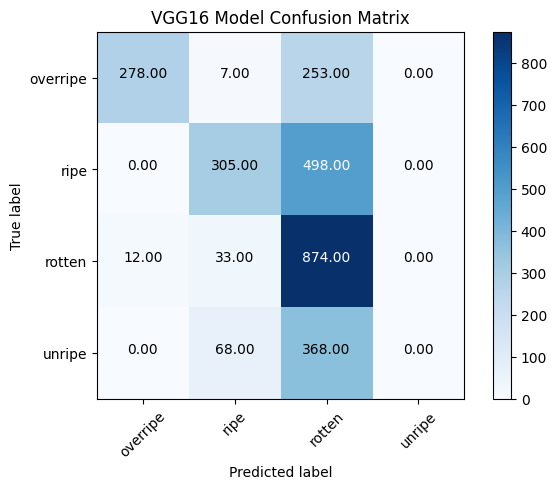

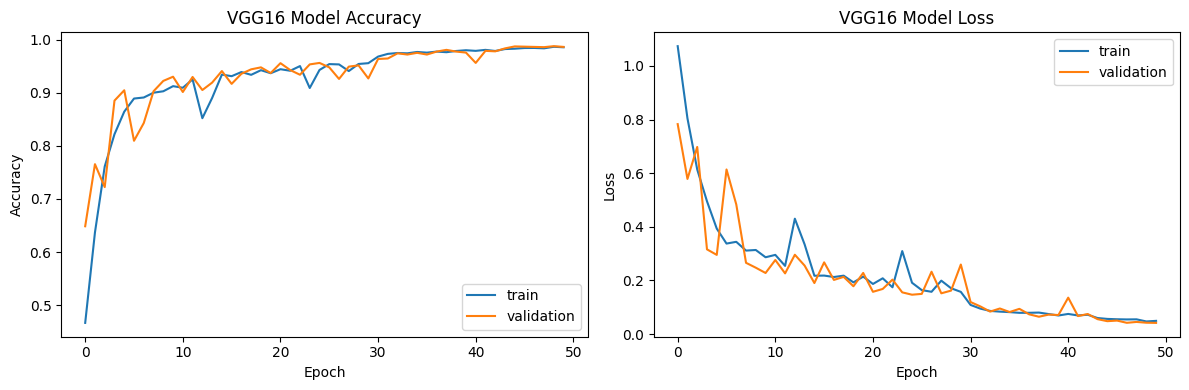

In [ ]:
# VGG16 Model Sonuçları
evaluate_model(vgg16_model, 'VGG16')
plot_history(vgg16_history, 'VGG16')

85/85 [==============================] - 4s 41ms/step - loss: 2.2816 - accuracy: 0.2978
VGG19 Model Test Loss: 2.282
VGG19 Model Test Accuracy: 0.298
85/85 [==============================] - 4s 41ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VGG19 Model Confusion Matrix:
[[  0 538   0   0]
 [  0 803   0   0]
 [  0 919   0   0]
 [  0 436   0   0]]
VGG19 Model Classification Report:
              precision    recall  f1-score   support

    overripe       0.00      0.00      0.00       538
        ripe       0.30      1.00      0.46       803
      rotten       0.00      0.00      0.00       919
      unripe       0.00      0.00      0.00       436

    accuracy                           0.30      2696
   macro avg       0.07      0.25      0.11      2696
weighted avg       0.09      0.30      0.14      2696

Confusion Matrix, Without Normalization
85/85 [==============================] - 3s 41ms/step
VGG19 Model Test Accuracy: 0.298
VGG19 Model Test Precision: 0.089
VGG19 Model Test Recall: 0.298
VGG19 Model Test F1 Score: 0.137


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


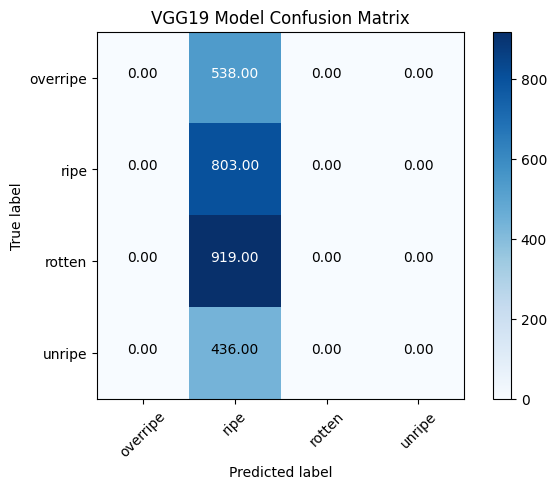

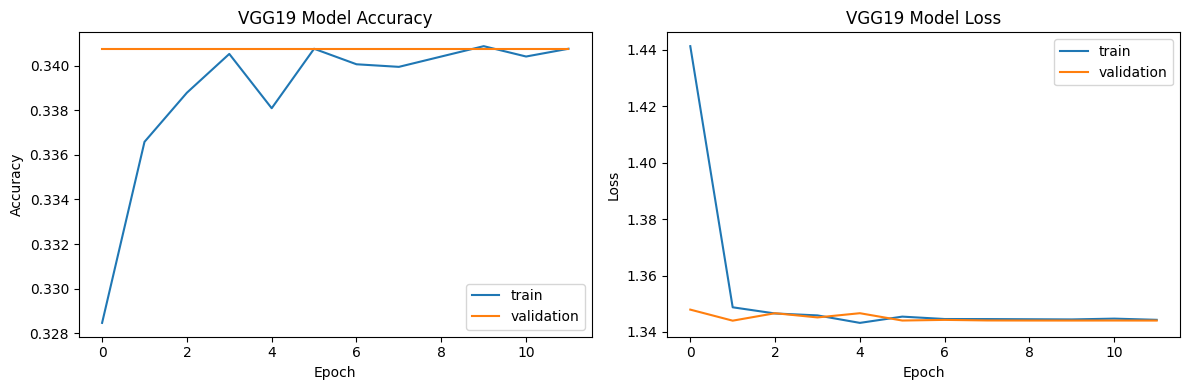

In [ ]:
# VGG19 Model Sonuçları
evaluate_model(vgg19_model, 'VGG19')
plot_history(vgg19_history, 'VGG19')

85/85 [==============================] - 5s 43ms/step - loss: 29240.3867 - accuracy: 0.3409
DenseNet121 Model Test Loss: 29240.387
DenseNet121 Model Test Accuracy: 0.341
85/85 [==============================] - 4s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DenseNet121 Model Confusion Matrix:
[[  0   0 538   0]
 [  0   0 803   0]
 [  0   0 919   0]
 [  0   0 436   0]]
DenseNet121 Model Classification Report:
              precision    recall  f1-score   support

    overripe       0.00      0.00      0.00       538
        ripe       0.00      0.00      0.00       803
      rotten       0.34      1.00      0.51       919
      unripe       0.00      0.00      0.00       436

    accuracy                           0.34      2696
   macro avg       0.09      0.25      0.13      2696
weighted avg       0.12      0.34      0.17      2696

Confusion Matrix, Without Normalization
85/85 [==============================] - 2s 26ms/step
DenseNet121 Model Test Accuracy: 0.341
DenseNet121 Model Test Precision: 0.116
DenseNet121 Model Test Recall: 0.341
DenseNet121 Model Test F1 Score: 0.173


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


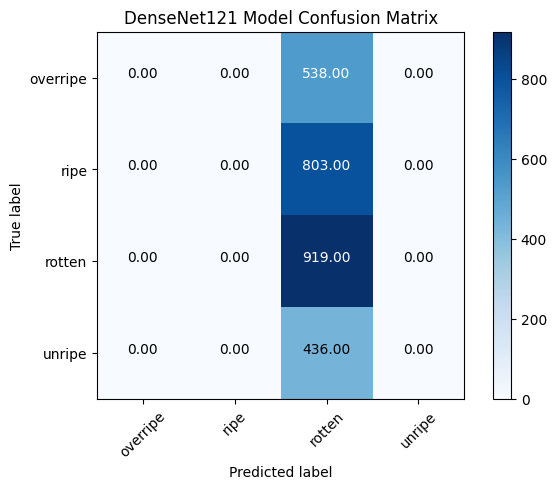

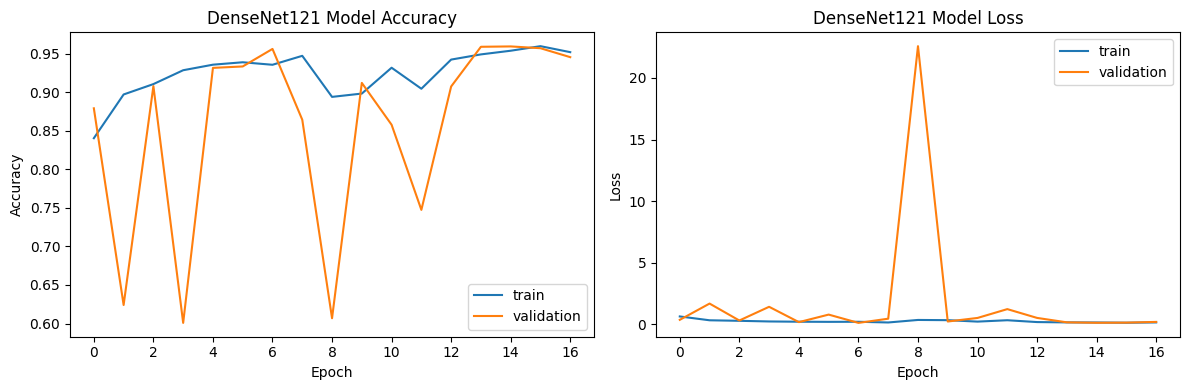

In [ ]:
# DenseNet121 Model Sonuçları
evaluate_model(densenet_model, 'DenseNet121')
plot_history(densenet_history, 'DenseNet121')